In [1]:
import tensorflow as tf

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = load_breast_cancer()

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
data.data.shape

(569, 30)

In [13]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.3)
N,D = x_train.shape

In [20]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(D,)),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=tf.keras.metrics.AUC())

In [36]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0845 - auc: 0.9960 - val_loss: 0.1253 - val_auc: 0.9902
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0840 - auc: 0.9960 - val_loss: 0.1247 - val_auc: 0.9904
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0835 - auc: 0.9960 - val_loss: 0.1242 - val_auc: 0.9905
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0829 - auc: 0.9961 - val_loss: 0.1237 - val_auc: 0.9907
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0824 - auc: 0.9961 - val_loss: 0.1232 - val_auc: 0.9907
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0820 - auc: 0.9962 - val_loss: 0.1227 - val_auc: 0.9908
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0815 - auc: 0.9962 - val_loss: 0.1222 - val_auc: 0.9908
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0811 - a

13/13 [==============================] - 0s 2ms/step - loss: 0.0653 - auc: 0.9966 - val_loss: 0.1057 - val_auc: 0.9926
Epoch 64/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0650 - auc: 0.9966 - val_loss: 0.1056 - val_auc: 0.9926
Epoch 65/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0649 - auc: 0.9966 - val_loss: 0.1054 - val_auc: 0.9926
Epoch 66/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0647 - auc: 0.9966 - val_loss: 0.1052 - val_auc: 0.9926
Epoch 67/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0645 - auc: 0.9967 - val_loss: 0.1050 - val_auc: 0.9926
Epoch 68/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0644 - auc: 0.9967 - val_loss: 0.1049 - val_auc: 0.9925
Epoch 69/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0643 - auc: 0.9967 - val_loss: 0.1045 - val_auc: 0.9926
Epoch 70/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0640 - auc: 0

In [37]:
print('Train Score',model.evaluate(x_train,y_train))
print('Test Score',model.evaluate(x_test,y_test))

13/13 [==============================] - 0s 834us/step - loss: 0.0597 - auc: 0.9966
Train Score [0.059718649834394455, 0.9965929388999939]
6/6 [==============================] - 0s 801us/step - loss: 0.0999 - auc: 0.9931
Test Score [0.09986428171396255, 0.9931372404098511]


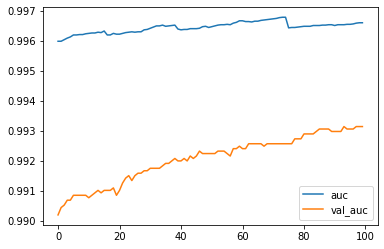

In [38]:
import matplotlib.pyplot as plt
plt.plot(r.history['auc'],label='auc')
plt.plot(r.history['val_auc'],label='val_auc')
plt.legend()